In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
SEED = int(time.time())

import sys
sys.path.append('..')

from os.path import join
from datetime import datetime

DATAFOLDER = join('..', 'data')

# Load data and get chunks

In [2]:
data = pd.read_csv(join(DATAFOLDER, 'matches-Brazil.csv'))
data.head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds
0,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Atletico-MG,CSA,4.0,0.0,TEAM1,1.41,7.98,4.31
1,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Chapecoense-SC,Palmeiras,1.0,2.0,TEAM2,5.92,1.63,3.51
2,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Internacional,Avai,2.0,0.0,TEAM1,1.43,8.22,4.15
3,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559512800,1559518200,Athletico-PR,Fluminense,3.0,0.0,TEAM1,1.64,5.39,3.77
4,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559512800,1559518200,Ceara,Santos,0.0,1.0,TEAM2,2.69,2.65,3.16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 13 columns):
league                6412 non-null object
area                  6412 non-null object
retrieved_from_url    6412 non-null object
start_time            6412 non-null int64
end_time              6412 non-null int64
team1                 6412 non-null object
team2                 6412 non-null object
team1_score           6411 non-null float64
team2_score           6411 non-null float64
outcome               6412 non-null object
team1_odds            6412 non-null object
team2_odds            6412 non-null object
draw_odds             6412 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 651.3+ KB


Check for NaN entries

In [4]:
data_dropped = data.dropna()
data_dropped.shape

(6411, 13)

# UTC data to readable data

In [5]:
def utc2time(d):
    return datetime.utcfromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S')

In [6]:
data.start_time = data_dropped.start_time.apply(utc2time)
data.end_time = data_dropped.end_time.apply(utc2time)

### Sort data

In [7]:
data.sort_values(by='start_time', inplace=True)
data.head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds
6029,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Botafogo RJ,Goias,1.0,4.0,TEAM2,1.9,3.64,3.2
6030,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Figueirense,Internacional,1.0,0.0,TEAM1,2.1,3.15,3.17
6031,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Sao Caetano,Vitoria,1.0,0.0,TEAM1,1.5,6.17,3.48
6027,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Cruzeiro,Juventude,2.0,1.0,TEAM1,1.33,-,4.18
6028,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Palmeiras,Atletico-MG,0.0,0.0,DRAW,1.95,3.6,3.25


In [8]:
idx = data['start_time'] < '2018'
data_until2018 = data.loc[idx]
data_from2018 = data.drop(data_until2018.index)

In [9]:
data_from2018.shape

(450, 13)

In [10]:
data_until2018.shape

(5962, 13)

In [11]:
data.shape

(6412, 13)

# Overall data analyses

Let us take a look how many teams are in this database

In [12]:
teams1 = data_from2018['team1'].unique()
teams2 = data_from2018['team2'].unique()
all_teams = np.append(teams1, teams2)
all_teams

array(['Cruzeiro', 'Vitoria', 'Santos', 'America MG', 'Vasco',
       'Internacional', 'Corinthians', 'Athletico-PR', 'Sao Paulo',
       'Botafogo RJ', 'Bahia', 'Flamengo RJ', 'Parana', 'Chapecoense-SC',
       'Ceara', 'Atletico-MG', 'Palmeiras', 'Fluminense', 'Gremio',
       'Sport Recife', 'CSA', 'Avai', 'Fortaleza', 'Goias', 'Gremio',
       'Flamengo RJ', 'Ceara', 'Sport Recife', 'Atletico-MG', 'Bahia',
       'Fluminense', 'Chapecoense-SC', 'Parana', 'Palmeiras', 'Santos',
       'America MG', 'Corinthians', 'Vasco', 'Sao Paulo', 'Vitoria',
       'Internacional', 'Cruzeiro', 'Athletico-PR', 'Botafogo RJ', 'Avai',
       'CSA', 'Goias', 'Fortaleza'], dtype=object)

In [13]:
all_teams = np.unique(all_teams)
all_teams

array(['America MG', 'Athletico-PR', 'Atletico-MG', 'Avai', 'Bahia',
       'Botafogo RJ', 'CSA', 'Ceara', 'Chapecoense-SC', 'Corinthians',
       'Cruzeiro', 'Flamengo RJ', 'Fluminense', 'Fortaleza', 'Goias',
       'Gremio', 'Internacional', 'Palmeiras', 'Parana', 'Santos',
       'Sao Paulo', 'Sport Recife', 'Vasco', 'Vitoria'], dtype=object)

In [14]:
all_teams.shape

(24,)

There are 24 teams that participate in league up to 2018. Let's take a look on:
- How many matches which teams has been participated.

In [15]:
def set_year(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return date.year

In [16]:
data_until2018['year'] = data_until2018['start_time'].apply(set_year)

/home/navar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data_team_by_year = data_until2018.groupby(by=['year', 'team1']).team1.count()

In [18]:
data_team_by_year.head()

year  team1       
2004  Athletico-PR    23
      Atletico-MG     22
      Botafogo RJ     23
      Corinthians     23
      Coritiba        23
Name: team1, dtype: int64

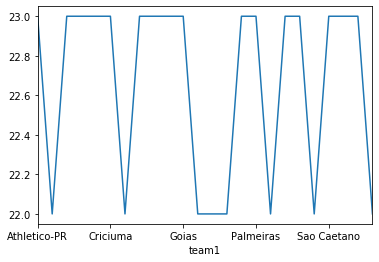

In [19]:
data_team_by_year.loc[2004].plot()

In a give year all team attent to the same number o matches.

In [20]:
gb_year = data_until2018.groupby(by='year')
gb_year.get_group(2010).head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds,year
3518,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Palmeiras,Vitoria,1.0,0.0,TEAM1,1.6,5.5,3.7,2010
3517,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Botafogo RJ,Santos,3.0,3.0,DRAW,2.36,2.79,3.34,2010
3516,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Atletico GO,Gremio,0.0,0.0,DRAW,2.23,3.06,3.32,2010
6411,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Palmeiras,Vitoria,1.0,0.0,TEAM1,1.6,5.5,3.7,2010
6409,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Atletico GO,Gremio,0.0,0.0,DRAW,2.23,3.06,3.32,2010


In [67]:
count_outcome_by_year = gb_year.outcome.value_counts().unstack()
count_outcome_by_year

outcome,DRAW,TEAM1,TEAM2
year,,,
2004,139,283,122
2005,102,230,121
2006,96,191,92
2007,90,190,97
2008,96,208,76
2009,102,195,83
2010,236,358,166
2011,105,184,91
2012,105,183,92


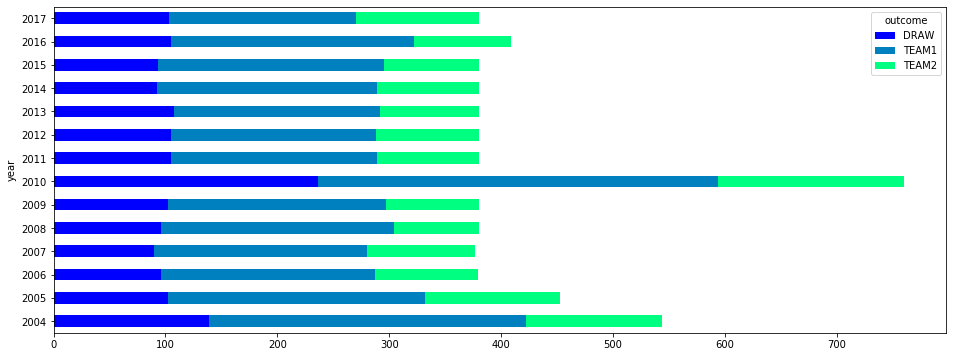

In [68]:
count_outcome_by_year.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

We can see that the number of matches that resulted in `DRAW` tend to be the same over a 7 year period. 

In [70]:
count_outcome_by_year.describe()

outcome,DRAW,TEAM1,TEAM2
count,14.000000,14.000000,14.000000
mean,112.285714,213.500000,100.071429
std,37.524205,50.125611,23.341822
min,90.000000,167.000000,76.000000
25%,96.000000,185.500000,87.250000
50%,102.500000,196.000000,91.500000
75%,105.000000,214.750000,106.750000
max,236.000000,358.000000,166.000000


In [71]:
def matches_percentage(row):
    return row / row.sum()

In [72]:
for idx, row in count_outcome_by_year.iterrows():
    count_outcome_by_year.loc[idx] = matches_percentage(row)

In [75]:
count_outcome_by_year.describe()

outcome,DRAW,TEAM1,TEAM2
count,14.000000,14.000000,14.000000
mean,0.261125,0.502678,0.236197
std,0.021832,0.028320,0.023456
min,0.225166,0.439474,0.200000
25%,0.246711,0.484211,0.219737
50%,0.256119,0.505853,0.235526
75%,0.275000,0.519771,0.242584
max,0.310526,0.547368,0.289474


About **26%** of matches resulted in `DRAW`

But what happened in **2010**?

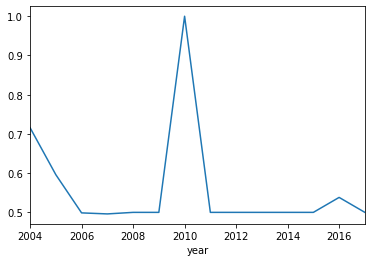

In [50]:
(gb_year.outcome.count() / gb_year.outcome.count().max()).plot()

In 2010 there were more about **50%** more matches than in other years. Why is that? Is that an outlier? Let us to investigate how many matches team have attend in this year.

In [77]:
gb_team1 = data_until2018.groupby(by='team1')

In [22]:
gb_outcome = data_until2018.groupby(by=['outcome', 'year'])
gb_outcome

In [23]:
gb_outcome['team1']

In [24]:
gb_team1 = data_until2018.groupby(by='team1')
gb_year.get_group('Palmeiras').head()

KeyError: 'Palmeiras'

In [ ]:
data_from2018.groupby('start_time')

In [ ]:
data_from2018.groupby('start_time')